In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

def explore_nhanes_files():
    """Print available columns in each NHANES file"""
    data_dir = 'data'
    
    print("Exploring NHANES files:\n")
    
    # Check demographics data
    print("Demographics (DEMO_J.XPT) columns:")
    demo_data = pd.read_sas(os.path.join(data_dir, 'DEMO_J.XPT'))
    print(demo_data.columns.tolist())
    
    # Check laboratory data
    print("\nLaboratory (CBC_J.XPT) columns:")
    cbc_data = pd.read_sas(os.path.join(data_dir, 'CBC_J.XPT'))
    print(cbc_data.columns.tolist())
    
    # Check body measures
    print("\nBody Measures (BMX_J.XPT) columns:")
    bmx_data = pd.read_sas(os.path.join(data_dir, 'BMX_J.XPT'))
    print(bmx_data.columns.tolist())
    
    # Check blood pressure
    print("\nBlood Pressure (BPX_J.XPT) columns:")
    bpx_data = pd.read_sas(os.path.join(data_dir, 'BPX_J.XPT'))
    print(bpx_data.columns.tolist())

# Explore the files
explore_nhanes_files()

Exploring NHANES files:

Demographics (DEMO_J.XPT) columns:
['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR']

Laboratory (CBC_J.XPT) columns:
['SEQN', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'LBXNRBC']

Body Measures (BMX_J.XPT) columns:
['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEA

In [2]:
def fetch_nhanes_data():
    """Load NHANES data from local files"""
    print("Loading local NHANES data files...")
    
    data_dir = 'data'
    
    try:
        # Load Demographics data
        print("Loading demographics data...")
        demo_data = pd.read_sas(os.path.join(data_dir, 'DEMO_J.XPT'))
        
        # Load Laboratory data
        print("Loading laboratory data...")
        cbc_data = pd.read_sas(os.path.join(data_dir, 'CBC_J.XPT'))
        
        # Load Body Measures
        print("Loading body measures data...")
        bmx_data = pd.read_sas(os.path.join(data_dir, 'BMX_J.XPT'))
        
        # Load Blood Pressure
        print("Loading blood pressure data...")
        bpx_data = pd.read_sas(os.path.join(data_dir, 'BPX_J.XPT'))
        
        # Merge datasets with corrected column names
        data = demo_data[['SEQN', 'RIDAGEYR', 'RIAGENDR']]
        data = data.merge(cbc_data[['SEQN', 'LBXRBCSI', 'LBXWBCSI', 'LBXHGB', 'LBXPLTSI']], 
                          on='SEQN', how='left')
        data = data.merge(bmx_data[['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI']], 
                          on='SEQN', how='left')
        data = data.merge(bpx_data[['SEQN', 'BPXSY1', 'BPXDI1']], 
                          on='SEQN', how='left')
        
        # Rename columns
        data = data.rename(columns={
            'RIDAGEYR': 'age',
            'RIAGENDR': 'gender',
            'LBXRBCSI': 'red_blood_cells',
            'LBXWBCSI': 'white_blood_cells',
            'LBXHGB': 'hemoglobin',
            'LBXPLTSI': 'platelets',
            'BMXWT': 'weight',
            'BMXHT': 'height',
            'BMXBMI': 'bmi',
            'BPXSY1': 'systolic_bp',
            'BPXDI1': 'diastolic_bp'
        })
        
        # Remove missing values
        data = data.dropna()
        
        return data
        
    except FileNotFoundError as e:
        print(f"Error: Could not find one or more data files in the 'data' directory")
        raise
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

# Load the data with corrected column names
print("Loading NHANES data...")
try:
    data = fetch_nhanes_data()
    print(f"Loaded {len(data)} samples")

    # Display first few rows and basic information
    print("\nFirst few rows:")
    display(data.head())

    print("\nDataset information:")
    display(data.info())
    
    # Display summary statistics
    print("\nSummary statistics:")
    display(data.describe())
    
except Exception as e:
    print(f"Error loading data: {str(e)}")

Loading NHANES data...
Loading local NHANES data files...
Loading demographics data...
Loading laboratory data...
Loading body measures data...
Loading blood pressure data...
Loaded 5848 samples

First few rows:


,SEQN,age,gender,red_blood_cells,white_blood_cells,hemoglobin,platelets,weight,height,bmi,systolic_bp,diastolic_bp
3,93706.0,18.0,1.0,5.24,6.1,16.3,233.0,66.3,175.7,21.5,112.0,74.0
4,93707.0,13.0,1.0,5.02,11.2,14.5,348.0,45.4,158.4,18.1,128.0,38.0
6,93709.0,75.0,2.0,5.13,7.2,15.4,228.0,88.8,151.1,38.9,120.0,66.0
8,93711.0,56.0,1.0,4.65,5.0,14.7,264.0,62.1,170.6,21.3,108.0,68.0
9,93712.0,18.0,1.0,5.12,7.1,15.5,211.0,58.9,172.8,19.7,112.0,68.0



Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 5848 entries, 3 to 9253
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEQN               5848 non-null   float64
 1   age                5848 non-null   float64
 2   gender             5848 non-null   float64
 3   red_blood_cells    5848 non-null   float64
 4   white_blood_cells  5848 non-null   float64
 5   hemoglobin         5848 non-null   float64
 6   platelets          5848 non-null   float64
 7   weight             5848 non-null   float64
 8   height             5848 non-null   float64
 9   bmi                5848 non-null   float64
 10  systolic_bp        5848 non-null   float64
 11  diastolic_bp       5848 non-null   float64
dtypes: float64(12)
memory usage: 593.9 KB


None


Summary statistics:


,SEQN,age,gender,red_blood_cells,white_blood_cells,hemoglobin,platelets,weight,height,bmi,systolic_bp,diastolic_bp
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5.848000e+03
mean,98334.750684,41.913304,1.507524,4.750576,7.304925,13.901590,249.958960,76.682627,163.996802,28.081635,121.486662,6.812756e+01
std,2681.766344,22.456156,0.499986,0.488284,5.660522,1.501298,64.366705,25.083266,12.467389,7.628057,19.602196,1.617988e+01
min,93706.000000,8.000000,1.000000,2.320000,1.900000,6.400000,8.000000,18.600000,109.500000,13.100000,78.000000,5.397605e-79
25%,96013.500000,20.000000,1.000000,4.430000,5.700000,13.000000,207.000000,60.000000,156.600000,22.800000,106.000000,6.000000e+01
50%,98369.500000,42.000000,2.000000,4.740000,7.000000,13.900000,243.000000,74.600000,164.600000,27.100000,118.000000,7.000000e+01
75%,100672.250000,61.000000,2.000000,5.060000,8.400000,14.900000,288.000000,90.800000,172.700000,32.200000,132.000000,7.800000e+01
max,102956.000000,80.000000,2.000000,7.840000,400.000000,19.900000,662.000000,219.600000,197.700000,84.400000,224.000000,1.240000e+02


In [3]:
# Install required packages
%pip install flask flask-cors numpy pandas scikit-learn joblib

Note: you may need to restart the kernel to use updated packages.


Model Performance:
R² Score: 0.620
RMSE: 13.64 years
MAE: 10.56 years

Feature Importance:


,feature,importance
7,systolic_bp,0.460198
4,weight,0.143110
0,red_blood_cells,0.077822
8,diastolic_bp,0.075589
3,platelets,0.074423
5,height,0.055327
6,bmi,0.043943
2,hemoglobin,0.033112
1,white_blood_cells,0.025761
9,gender,0.010715


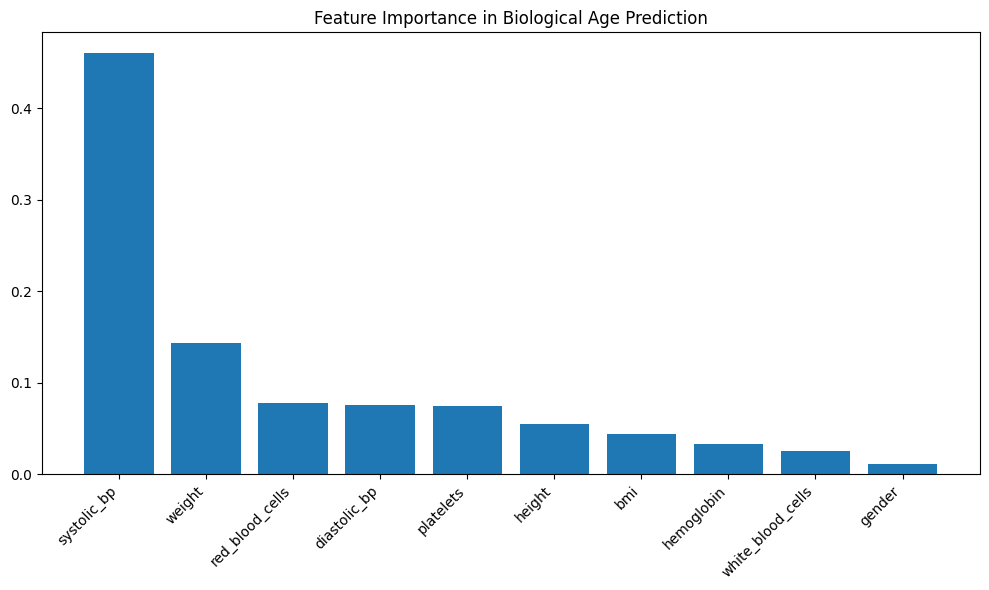


Model and scaler saved in 'models' directory

Example prediction for sample data:
Predicted biological age: 48.1 years


In [4]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
import pandas as pd

# Prepare features and target
feature_columns = [
    'red_blood_cells',
    'white_blood_cells',
    'hemoglobin',
    'platelets',
    'weight',
    'height',
    'bmi',
    'systolic_bp',
    'diastolic_bp',
    'gender'
]

X = data[feature_columns]
y = data['age']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f} years")
print(f"MAE: {mae:.2f} years")

# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)  # Fixed this line

print("\nFeature Importance:")
display(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Biological Age Prediction')
plt.tight_layout()
plt.show()

# Save the model and scaler
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(model, 'models/bioage_model.joblib')
joblib.dump(scaler, 'models/bioage_scaler.joblib')
print("\nModel and scaler saved in 'models' directory")

# Example prediction
sample_data = pd.DataFrame([{
    'red_blood_cells': 4.8,
    'white_blood_cells': 7.0,
    'hemoglobin': 14.0,
    'platelets': 250,
    'weight': 70,
    'height': 170,
    'bmi': 24.2,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'gender': 1
}])

sample_scaled = scaler.transform(sample_data)
predicted_age = model.predict(sample_scaled)[0]
print(f"\nExample prediction for sample data:")
print(f"Predicted biological age: {predicted_age:.1f} years")

In [5]:
import os
assert os.path.exists('models/bioage_model.joblib'), "Model file not found!"
assert os.path.exists('models/bioage_scaler.joblib'), "Scaler file not found!"

In [6]:
sample_data = pd.DataFrame([{
    'red_blood_cells': 4.8,
    'white_blood_cells': 7.0,
    'hemoglobin': 14.0,
    'platelets': 250,
    'weight': 70,
    'height': 170,
    'bmi': 24.2,
    'systolic_bp': 120,
    'diastolic_bp': 80,
    'gender': 1
}])

sample_scaled = scaler.transform(sample_data)
predicted_age = model.predict(sample_scaled)[0]
print(f"Predicted biological age: {predicted_age:.1f} years")

Predicted biological age: 48.1 years
